In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

Fault Detction EDA

In [2]:
waf=pd.read_csv("../notebooks/wafer_data.csv")
print(waf.shape)
waf.head()

(100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [3]:
waf.drop(columns=['Unnamed: 0',"Good/Bad"]).iloc[:100].to_csv("test.csv",index=False)

In [4]:
waf.rename(columns={"Unnamed: 0":"wafer"},inplace=True)

In [5]:
waf.head()

,wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [6]:
from sklearn.model_selection import train_test_split
waf,waf_test=train_test_split(waf,test_size=0.2,random_state=42)

In [7]:
waf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 592 entries, wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [8]:
waf.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.048228,2494.058875,2202.758988,1519.467071,1.201382,100.0,96.881160,0.122158,1.460087,0.000946,...,63.785093,0.499493,0.013905,0.003591,2.785103,0.023543,0.014155,0.004439,72.116730,-0.850000
std,72.665372,68.166898,31.633772,471.962104,0.365870,0.0,5.520108,0.002062,0.072159,0.010865,...,30.722790,0.003683,0.004577,0.000908,0.923064,0.011668,0.007263,0.002324,50.770394,0.530106
min,2889.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.026500,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2975.425000,2452.517500,2189.966700,1111.543600,0.850075,100.0,93.547250,0.120800,1.409950,-0.005750,...,46.961400,0.497175,0.011500,0.003100,2.298350,0.013850,0.009000,0.002650,33.654025,-1.000000
50%,3004.390000,2502.445000,2200.955600,1308.647900,1.164250,100.0,99.217800,0.122150,1.451900,0.001500,...,54.476100,0.499450,0.012950,0.003400,2.577150,0.021800,0.013100,0.003800,59.082500,-1.000000
75%,3065.730000,2532.755000,2212.866700,1997.641600,1.383000,100.0,101.133300,0.123375,1.498675,0.009000,...,80.740300,0.501700,0.014950,0.003925,2.992300,0.028100,0.018400,0.005750,93.190025,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,103.091100,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


### insights

- we have bad outliers.Data is standardised.

In [9]:
waf['Good/Bad'].value_counts()

Good/Bad
-1    74
 1     6
Name: count, dtype: int64

- data is heavily imbalanced
- data missing drop,missing features impute

In [10]:
waf['Good/Bad'].isna().sum()

0

In [11]:
waf.isna().sum().sum()

1822

missing values in dependent features

In [12]:
waf.isna().sum().sum()/(waf.shape[0]*(waf.shape[1]-1))

0.038536379018612524

- 4% cell have missing data
- we are gona try all type of imputation stratiges

##### visualizing sensor distribution


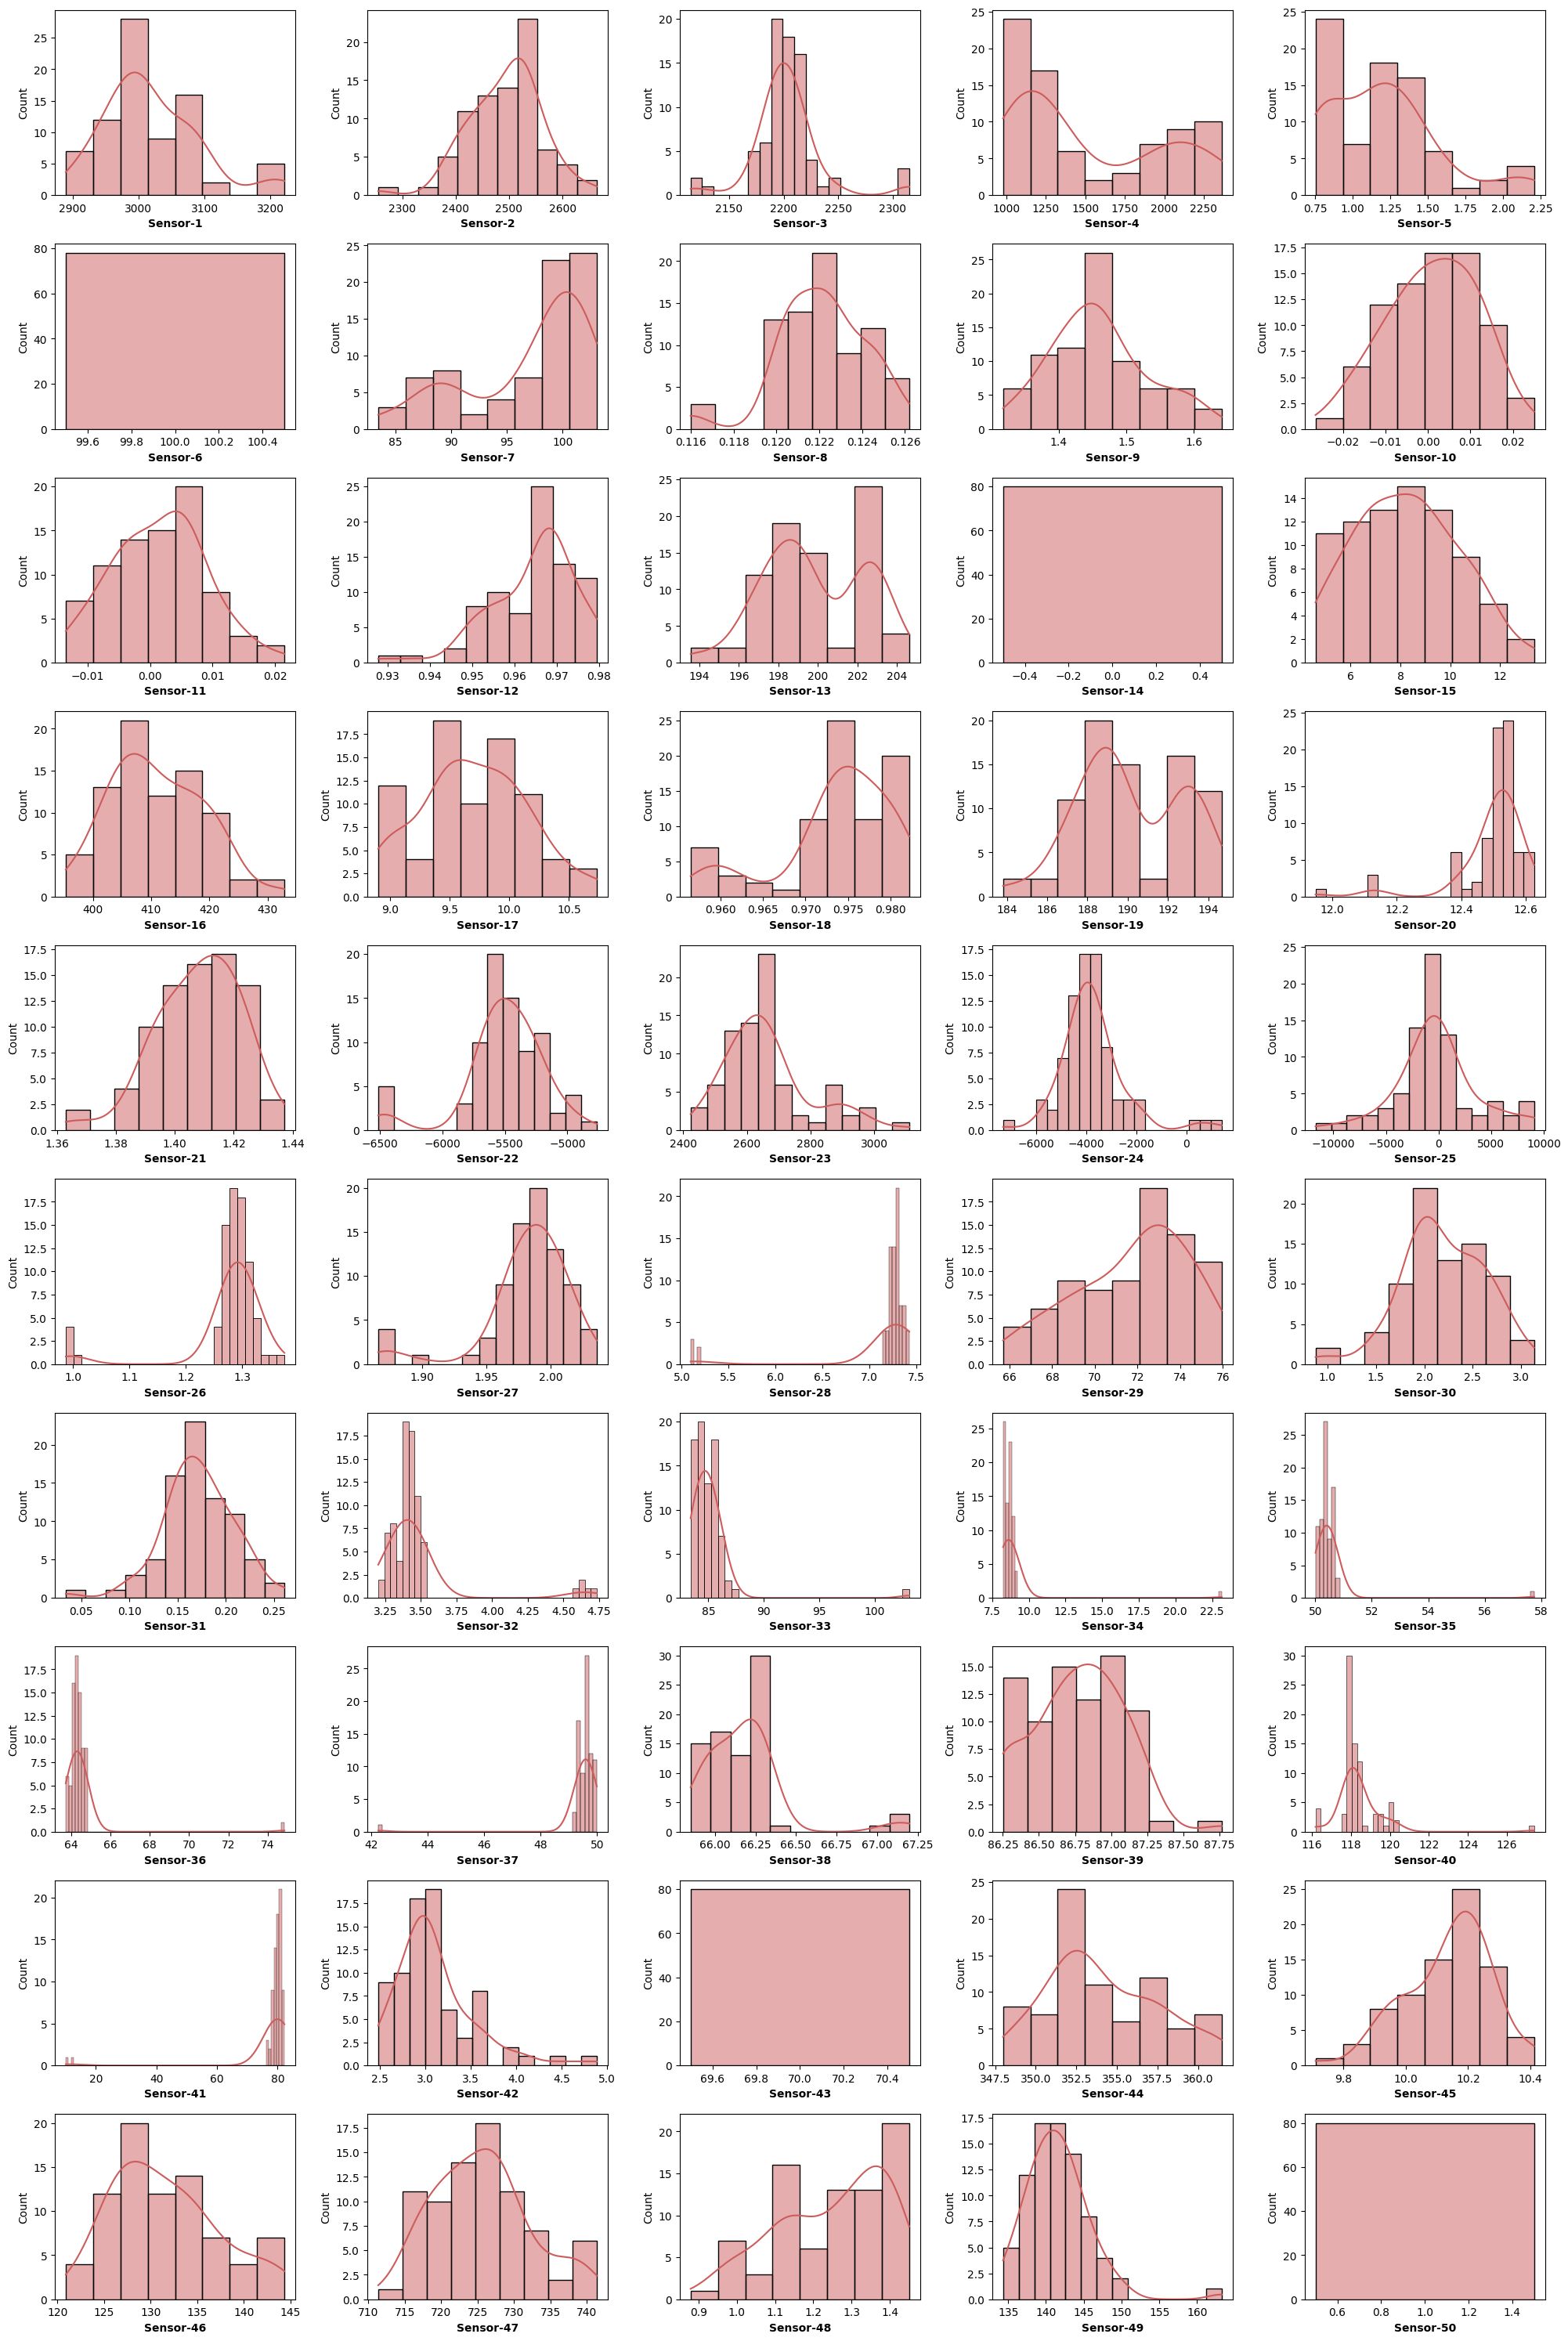

In [13]:


# Choose how many rows and cols you want in grid
n_cols = 5
n_rows = 10

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(waf.columns[1:51]):
    sns.histplot(waf[col], kde=True, color='indianred', ax=axes[i])
    axes[i].set_xlabel(col, weight='bold')

# Remove any unused subplots (if less than rows*cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


select 50 sensor

In [14]:
random_50=[]
for i in range(50):
    if i not in random_50:
        random_50.append(np.random.randint(1,592))

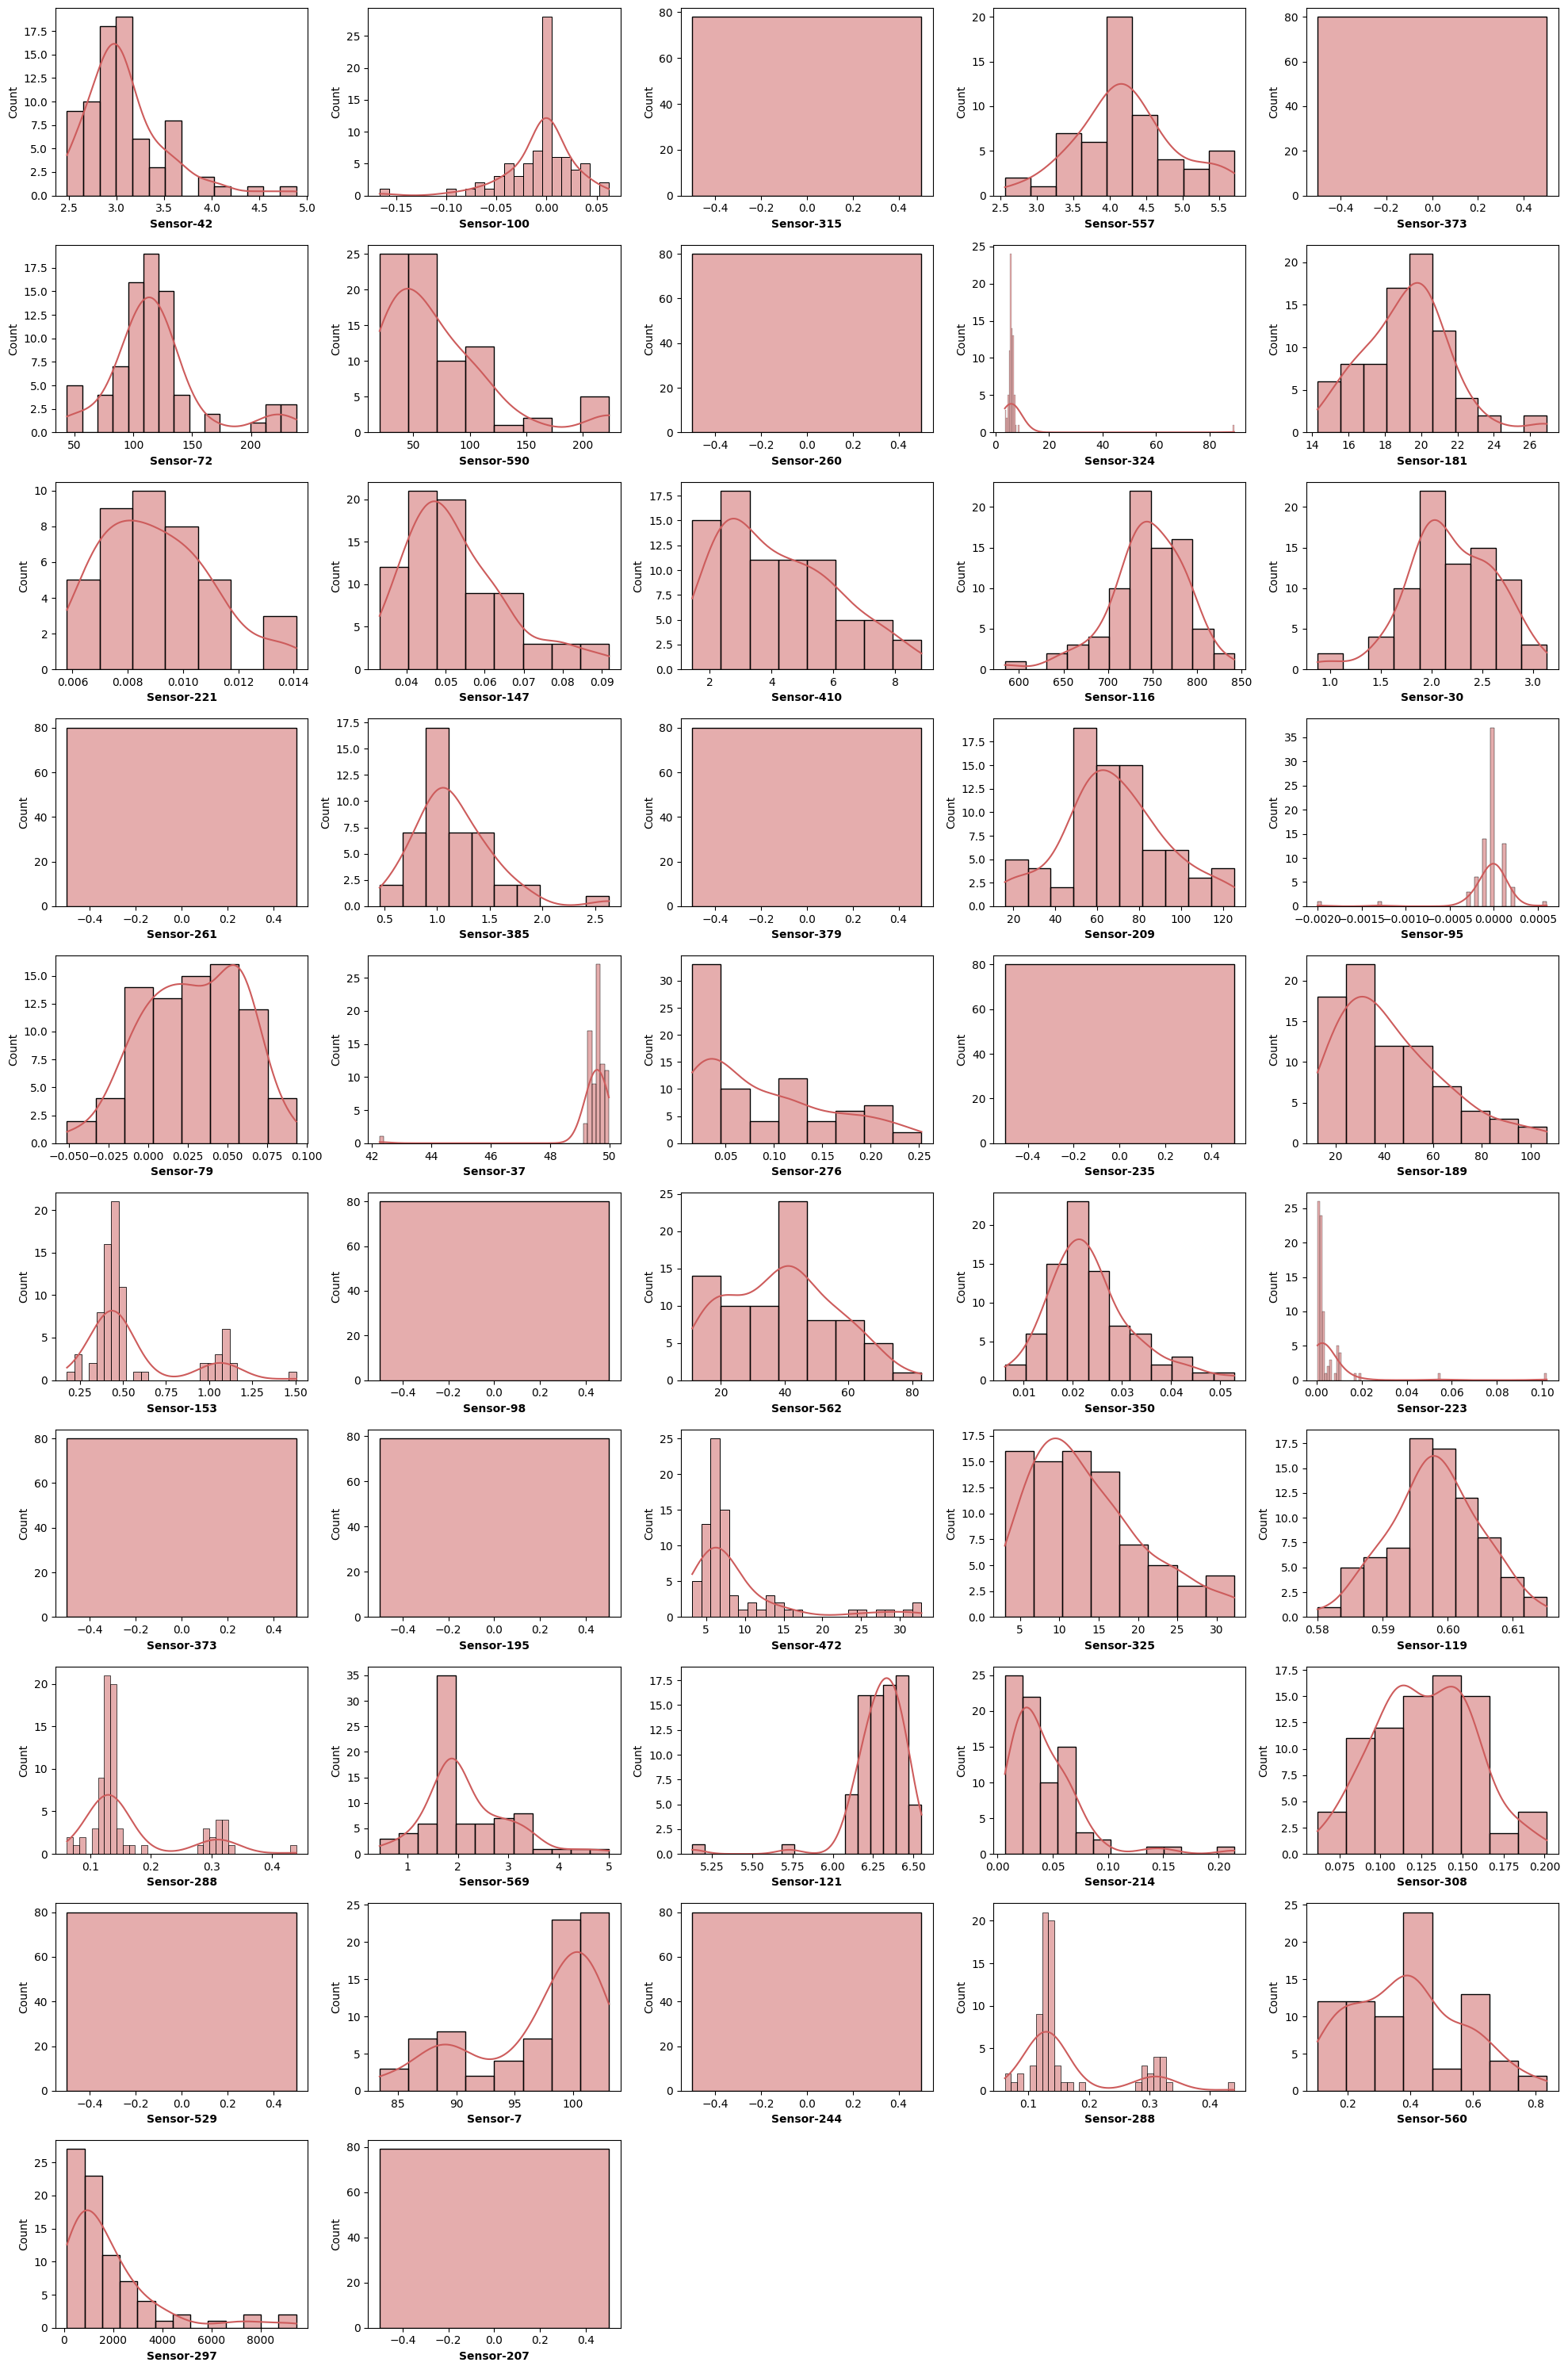

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose how many rows and cols you want in grid
n_cols = 5
n_rows = 10

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(waf.columns[random_50]):
    sns.histplot(waf[col], kde=True, color='indianred', ax=axes[i])
    axes[i].set_xlabel(col, weight='bold')

# Remove any unused subplots (if less than rows*cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- first 50 or random 50 are constant 
- have left /right skewnwss
- it is not possible to analyze each feature and deal with outlier individuly
- thus we have to depend on scaling 
- with feature std dev 0 drop them , outiler we can scale


In [16]:
def get_cols_with_zero_std(df:pd.DataFrame):
    col_drop=[]
    num_col=[col for col in df.columns if df[col].dtype !='object']
    for col in num_col:
        if df[col].std()==0:
            col_drop.append(col)
    return col_drop

def get_redundant_cols(df:pd.DataFrame,missing_threshold=0.7):
    cols_missing_ratio=df.isna().sum().div(df.shape[0])
    cols_to_drop=list(cols_missing_ratio[cols_missing_ratio>missing_threshold].index)
    return cols_to_drop

In [17]:
col_to_drop_1=get_redundant_cols(waf,missing_threshold=0.7)
col_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [18]:
col_to_drop_2=get_cols_with_zero_std(waf)
col_to_drop_2.append("wafer")
col_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [19]:
col_to_drop=col_to_drop_2+col_to_drop_1
len(col_to_drop)

127

Separate features and labels out

In [20]:
x, y = waf.drop(col_to_drop, axis=1), waf[["Good/Bad"]]

In [21]:
print(x.shape)
x.head()

(80, 465)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,-0.0066,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,0.0135,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,-0.0064,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,0.0037,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


In [22]:
print(y.shape)
y.head()

(80, 1)


,Good/Bad
55,-1
88,-1
26,-1
42,-1
69,-1


Data transformation

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

In [24]:
imputer=KNNImputer(n_neighbors=3)
preprocessing_pipeline=Pipeline(steps=[('Imputer',imputer),('scaler',RobustScaler())])
preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('scaler', RobustScaler())])

In [25]:
xtrans=preprocessing_pipeline.fit_transform(x)
print(xtrans.shape)
xtrans

(80, 465)


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.        ,
         0.75955556,  0.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.51612903,
        -0.52610857,  0.        ],
       [-0.60204699,  0.28110298, -0.49685153, ...,  0.58064516,
        -0.08775867,  0.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ...,  0.12903226,
        -0.17805529,  0.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.29032258,
         0.28421459,  0.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.16129032,
        -0.20782888,  0.        ]])

- shall we clustor wafers instances ?

In [26]:
# !pip install kneed

In [27]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass

In [28]:

@dataclass
class ClusterDataInstances:
    """Divides the given data instances into different clusters via KMeans Clustering algorithm.

    Args:
        X (np.array): Takes in an array which gotta be clustered.
        desc (str): Description of the said array.
    """
    X: np.array
    desc: str

    def _get_ideal_number_of_clusters(self):
        """Returns the ideal number of clusters the given data instances should be divided into by 
        locating the dispersal point in number of clusters vs WCSS plot.

        Raises:
            e: Raises relevant exception should any kinda error pops up while determining the ideal
            number of clusters.

        Returns:
            int: Ideal number of clusters the given data instances should be divided into.
        """
        try:
            print(
                f'Getting the ideal number of clusters to cluster "{self.desc} set" into..')

            ####################### Compute WCSS for shortlisted number of clusters ##########################
            print("computing WCSS for shortlisted number of clusters..")
            wcss = []  # Within Summation of Squares
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++',
                                random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")
            print(
                "WCSS computed successfully for all shortlisted number of clusters!")

            ################### Finalize dispersal point as the ideal number of clusters #####################
            print(
                "Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..")
            knee_finder = KneeLocator(
                range(1, 11), wcss, curve='convex', direction='decreasing')  # range(1, 11) vs WCSS
            print(
                f"Ideal number of clusters to be formed: {knee_finder.knee}")

            return knee_finder.knee
            ...
        except Exception as e:
            print(e)
            raise e

    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand shoud've been divided into
        via offcourse Kmeans Clustering algorithm.

        Raises:
            e: Raises relevant exception should any kinda error pops up while dividing the given data instances into
            clusters.

        Returns:
            (KMeans, np.array): KMeans Clustering object being used to cluster the given data instances and the given dataset 
            along with the cluster labels, respectively.
        """
        try:
            ideal_clusters = self._get_ideal_number_of_clusters()
            print(
                f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering algorithm..")
            kmeans = KMeans(n_clusters=ideal_clusters,
                            init='k-means++', random_state=42)
            y_kmeans = kmeans.fit_predict(self.X)
            print(
                f"..said data instances divided into {ideal_clusters} clusters successfully!")

            return kmeans, np.c_[self.X, y_kmeans]
            ...
        except Exception as e:
            print(e)
            raise e

In [29]:
cluster_waf=ClusterDataInstances(xtrans, desc="wafer features")
cluster,xclus=cluster_waf.create_clusters()
xclus

Getting the ideal number of clusters to cluster "wafer features set" into..
computing WCSS for shortlisted number of clusters..
WCSS for n_clusters=1: 7157148.928067336
WCSS for n_clusters=2: 2060306.1634277871
WCSS for n_clusters=3: 1075227.4800905853
WCSS for n_clusters=4: 524755.6688687304
WCSS for n_clusters=5: 313453.1212190197
WCSS for n_clusters=6: 265314.7876956912
WCSS for n_clusters=7: 217123.21597691026
WCSS for n_clusters=8: 181392.737158788
WCSS for n_clusters=9: 141274.46242833772
WCSS for n_clusters=10: 108703.08733901892
WCSS computed successfully for all shortlisted number of clusters!
Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..
Ideal number of clusters to be formed: 3
Dividing the "wafer features" instances into 3 clusters via KMeans Clustering algorithm..
..said data instances divided into 3 clusters successfully!


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.75955556,
         0.        ,  1.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.52610857,
         0.        ,  1.        ],
       [-0.60204699,  0.28110298, -0.49685153, ..., -0.08775867,
         0.        ,  1.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ..., -0.17805529,
         0.        ,  2.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.28421459,
         0.        ,  1.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.20782888,
         0.        ,  1.        ]])

In [30]:
# cluster

np.unique(xclus[:, -1])


array([0., 1., 2.])

In [31]:
wafers_clus = np.c_[xclus, y]

## Cluster_1 data
wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
wafers_1.shape

(1, 467)

In [32]:
# clustor_2 data
wafers_clus[wafers_clus[:, -2]==1].shape

(62, 467)

In [33]:
# cluster_3 data
wafers_clus[wafers_clus[:,-2]==2].shape

(17, 467)

**=>** Thus we mustn't divide the dataset into clusters. Not a good idea!

Resampling

In [34]:
from imblearn.combine import SMOTETomek
x,y=xtrans[:,:-1],y
resampler=SMOTETomek(sampling_strategy="auto")
xres,yres=resampler.fit_resample(x,y)

In [35]:
print("befor",np.c_[x,y].shape)
print("after",np.c_[xres,yres].shape)

befor (80, 465)
after (148, 465)


In [36]:
print(np.unique(yres))
print("value counts:\n-1:",(len(yres[yres==-1])),"\n1:",(len(yres[yres==1])))

[-1  1]
value counts:
-1: 148 
1: 148


Prepare Test set

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xres,yres,test_size=0.2,random_state=42)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(118, 464) (30, 464) (118, 1) (30, 1)


Model Selection

In [38]:
xprep=xtrain
yprep=ytrain
xtestprep=xtest
ytestprep=ytest
print(xprep.shape,yprep.shape,xtestprep.shape,ytestprep.shape)

(118, 464) (118, 1) (30, 464) (30, 1)


In [40]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

svcclf=SVC(kernel='linear')
svcrbfclf=SVC(kernel='rbf')
random_clf=RandomForestClassifier(random_state=42)
xgbclf=XGBClassifier(objective='binary:logistic')

In [41]:
def display_scors(scores):
    print(scores)
    print(f"Mean score: {scores.mean()}")
    print(f"standard deviation: {scores.std()}")

In [42]:
svc_scores=cross_val_score(svcclf,xprep,yprep,scoring='roc_auc',cv=10,verbose=2)

[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [43]:
display_scors(svc_scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 1.0
standard deviation: 0.0


In [44]:
svcpred=cross_val_predict(svcclf,xtestprep,ytestprep,cv=5)
svc_auc=roc_auc_score(ytestprep,svcpred)
svc_auc

0.90625

svc-kernel=>rbf

In [45]:
svc_rbf=cross_val_score(svcrbfclf,xprep,yprep,scoring='roc_auc',cv=10,verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [46]:
display_scors(svc_rbf)


[0.91666667 1.         0.88888889 1.         1.         1.
 1.         0.83333333 0.8        1.        ]
Mean score: 0.9438888888888888
standard deviation: 0.07455423082115013


In [47]:
svc_rbf_pred=cross_val_predict(svcrbfclf,xtestprep,ytestprep,cv=5)
svc_rbf_auc=roc_auc_score(ytestprep,svc_rbf_pred)
svc_rbf_auc

0.6875

RandomForest clf usingcv

In [48]:
random_clf_scores=cross_val_score(random_clf,xprep,yprep,scoring='roc_auc',cv=10,verbose=2)

[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s


In [49]:
display_scors(random_clf_scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 1.0
standard deviation: 0.0


In [50]:
random_clf_pred=cross_val_predict(random_clf,xtestprep,ytestprep,cv=5)

In [51]:
random_clf_Auc=roc_auc_score(ytestprep,random_clf_pred)
random_clf_Auc

1.0